# Getting started with DMFF: A comprehensive beginner's tutorial.
**In the simulation of molecular systems, the underlying force field (FF) model plays an extremely important role, determining the reliability of the simulation. However, the quality of the state-of-the-art molecular force fields is still unsatisfactory in many cases, and the FF parameterization process largely relies on human experience, which is not scalable. To address this issue, we introduce DMFF (Differentiable Molecular Force Field), an open-source molecular FF development platform based on automatic differentiation technique. Using DMFF, both energies/forces and thermodynamic quantities such as ensemble averages and free energies can be evaluated in a differentiable way, realizing an automatic, yet highly
flexible force field optimization workflow**

For more details, please refer to this link: https://mp.weixin.qq.com/s/eVXTr1eU1-dGbC5UFybr0g

**Note**: JAX, DMFF, and other related tools are still undergoing rapid development and iteration. This notebook has been successfully executed using DMFF 0.2.0.
> **Choose dmff:0.2.0-notebook and you can directly run this notebook on Bohrium** 

This notebook is primarily organized by Wei Feng.

# Before You Run

Molecular systems are a highly important category of systems, encompassing various organic molecules such as biomolecules, drug molecules, various coatings used in industries, porous materials like COFs, polymers and small molecule electrolytes in batteries, and more. Problems of interest in industries, such as structure prediction of biomolecules, drug screening, screening and design of materials, heavily rely on molecular dynamics (MD) simulations of molecular systems. Although the applications of MD have extended beyond molecular systems, simulating molecular systems remains one of the core applications of MD.

MD simulations usually rely on a potential energy surface (PES), which describes the energies and the forces of the simulated atoms. For the sake of computational efficiency, the PES is typically approximated using a classical model, namely molecular force field, instead of being computed ab initioly on-the-fly. Therefore, the quality of the underlying force field limits the accuracy and the predictive power of the simulation. 

So it's obvious that the core of simulation is fitting microscale interactions, or potential functions, to accurately predict macroscopic properties. In classical molecular dynamics, the potential function is expressed mathematically in terms of a molecular force field.

## What Is Molecular Force Field

As we mentioned above, one of the most important aspects in simulating molecular systems is characterizing the system's potential energy function and describing the interactions within the system. In Classical Molecular Dynamics (CMD) simulations, the potential energy function follows a fixed mathematical form, and the force field provides the mathematical functions for intermolecular and intramolecular interaction potentials. The traditional force fields commonly used in the industry, such as OPLS and GAFF, generally share a similar form:

![s](https://i.postimg.cc/SKJjsCjq/interact.jpg)

The total energy can be divided into bonded and nonbonded components. The bonded component naturally depends on the intramolecular coordinates (bond lengths, bond angles, dihedral angles), while the nonbonded component (further decomposable into van der Waals interactions and electrostatic interactions) naturally depends on the interatomic distances. This form is almost universally used as the standard form in the entire industry. However, the molecular force fields currently employed in industrial applications face several challenges:
- Lack of portability and predictive capability: When studying new systems, it is often uncertain which force field will yield better results until actual simulations are performed. Apart from relying on "experience," it can be challenging to determine the appropriate force field selection criteria.
- Parameter's non-uniqueness and inconsistency: It is common to encounter multiple sets of completely different parameters that yield similar macroscopic predictions. As a result, it is not possible to solely rely on macroscopic data to determine which set of parameters is more reasonable at the microscale. Moreover, similar molecular systems often have entirely different force field parameters, making it challenging to combine force fields developed by different research groups.

Over the past few decades, the development of empirical force fields and the improvement of computational accuracy have been both an age-old and emerging topic. The quest to accurately and efficiently describe atomic interactions and establish a technical roadmap for developing a molecular force field applicable to the majority of systems has been the focus of researchers in the field of molecular force fields and molecular dynamics.

The optimization of parameters in force fields has long relied on manual intervention and "empirical" parameter tuning methods. This reliance raises concerns about the reliability and efficiency of empirical force field fitting. However, with the advent of the artificial intelligence era, one underlying technology, automatic differentiation, offers a new solution. This technology has paved the way for the development of Differentiable Molecular Force Field (DMFF), which holds the promise of becoming a powerful tool for molecular force field developers.

## Automatic DIfferentiation & DMFF
Automatic differentiation is a high-precision and versatile method for computing derivatives in computer programs. It follows the mathematical chain rule to compute derivatives of composite functions. By tracing the derivative chains of every data point based on the computation graph, it can calculate the differentiation of the output with respect to the input variables.

Automatic differentiation plays a crucial role in optimizing neural network models. During model training, it is necessary to compute the gradients of the output with respect to the input variables through backpropagation and utilize gradient descent to optimize the model parameters. Automatic differentiation frameworks excel at achieving this task. With their efficient optimization capabilities for high-dimensional parameters, automatic differentiation techniques can be applied not only to neural network models but also to any framework that follows the "input model parameters → apply model computation → obtain computed results" structure. Molecular dynamics simulations precisely follow this workflow.

Therefore, leveraging automatic differentiation techniques and utilizing experimental or first-principles computed data as references, it is possible to optimize force field parameters by calculating the differentiation of the output results with respect to the input parameters through backpropagation. This enables the optimization of force field parameters in molecular dynamics simulations, just as in the optimization of neural network models.

![s](https://i.postimg.cc/Gp1S3JXT/Autod.jpg)

Several attempts have been made to harness automatic differentiation techniques for molecular dynamics simulations, such as TorchMD, JAX-MD, and SPONGE. However, the deep computational graph involved in molecular dynamics simulations often introduces additional challenges. The backpropagation process, which calculates the differentiation from the output results to the input variables, can be computationally expensive. Additionally, there is still a lack of simulation engines specifically designed for rapid implementation and parameter optimization of force fields. Molecular force field developers urgently require comprehensive support for a wider range of force field functional forms and various types of objective functions. Now DMFF comes.

![s](https://i.postimg.cc/CLkQ3QNp/dmffLogo.jpg)

DMFF provides a comprehensive and rapid implementation of force field models and offers differentiable estimators of system energy, forces, and thermodynamic quantities. These differentiable estimators allow for the definition of corresponding object functions, enabling an automatic optimization process.

As mentioned above, the deep computational graph spanning the entire trajectory in molecular dynamics simulations would be computationally expensive and time-consuming. However, this limitation can be mitigated by employing a reweighting scheme for the trajectory. In DMFF, the reweighting algorithm is incorporated into the MBAR method, and extends the differentiable estimators for average properties and free energy calculations. We will demonstrate this method with practical examples to showcase its effectiveness.

DMFF gives a solution to two major problems in molecular force field development:
- How to ensure the rapid implementation and iteration of complex force fields in molecular dynamics simulations?
- How to improve the efficiency of optimizing parameters in high-dimensional functions and automate this process, while increasing the transferability of the parameters?

In our latest release, DMFF 0.2.0, we have explored a pathway for automatic optimization of force field parameters. The corresponding workflow has been validated in both simple small molecular systems and more complex electrolyte systems. We will guide you through a step-by-step notebook experience, demonstrating the complete workflow of DMFF for automatic optimization of force field parameters. Furthermore, using the notebook as a teaching template, we will provide a real hands-on experience showcasing the impact of DMFF on force field development.

# Table of Contents:
* [1. Quick Start Guide to DMFF](#1)
    * [1.0 Import dependencies and prepare files](#1-1)
    * [1.1 Load existing force field parameters and topology](#1-2)
    * [1.2 Calculation](#1-3)
    * [1.3 [Review] Basic interface and key usage points of DMFF](#1-4)
* [2. Mutipolar polarizable force field with fluctuating charges](#2)
    * [2.1 Genearate auto-differentiable multipolar polarizable (ADMP) forces](#2-1)
    * [2.2 Implement fluctuating charges](#2-2)
 * [3. Bottom-Up Fitting](#3)
    * [3.1 Problem introduction](#3-1)
    * [3.2 Definition of potential function](#3-2)
    * [3.3 Preparing inputs for the potential function](#3-3)
    * [3.4 Definition of loss function](#3-5)
    * [3.5 Optimize](#3-6)
* [4.Using DMFF for force field optimization of liquid dimethyl carbonate (DMC)](#4)
    * [4.1 Introduction](#4-1)
    * [4.2 Definition of potential function](#4-2)
    * [4.3 Definition of OpenMM sampler](#4-3)
    * [4.4 Initial MD sampling](#4-4)
    * [4.5 Definition of property calculation functions](#4-5)
    * [4.6 Read the data and perform the comparison](#4-6)
    * [4.7 Estimator initialization](#4-7)
    * [4.8 Definition of target ensemble](#4-8)
    * [4.9 Definition of loss function](#4-9)
    * [4.10 Optimizer setup and optimization loop](#4-10)
* [5. Summary & Outlook](#summary)

## 1. Quick Start Guide to DMFF <a id ='1'></a>
This case is primarily contributed by Yanbo Han.
### 1.0 Import dependencies and prepare files <a id ='1-1'></a>
First, we set up the runtime environment and import the potential functions needed.

In [1]:
! rm -rf DMFF
! git clone https://github.com/deepmodeling/DMFF.git
! git config --global --add safe.directory `pwd`/DMFF
! cd DMFF && git checkout wangxy/v1.0.0-devel && pip install .

Cloning into 'DMFF'...
remote: Enumerating objects: 4249, done.
remote: Counting objects: 100% (532/532), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 4249 (delta 364), reused 466 (delta 328), pack-reused 3717
Receiving objects: 100% (4249/4249), 19.60 MiB | 4.03 MiB/s, done.
Resolving deltas: 100% (2754/2754), done.
Updating files: 100% (273/273), done.
Updating files: 100% (281/281), done.
Branch 'wangxy/v1.0.0-devel' set up to track remote branch 'wangxy/v1.0.0-devel' from 'origin'.
Switched to a new branch 'wangxy/v1.0.0-devel'
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Processing /data/DMFF
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 3.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for dmff: filename=dmff-0.2.

In [1]:
# CPU version
! pip install jax==0.4.14
# GPU version
! pip install optax==0.1.3 pymbar==4.0.1 jaxopt==0.8.1
! mamba install openmm=7.7.0 rdkit -c conda-forge -y

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Traceback (most recent call last):
  File "/opt/mamba/bin/mamba", line 7, in <module>
    from mamba.mamba import main
  File "/opt/mamba/lib/python3.10/site-packages/mamba/mamba.py", line 44, in <module>
    import libmambapy as api
  File "/opt/mamba/lib/python3.10/site-packages/libmambapy/__init__.py", line 7, in <module>
    raise e
  File "/opt/mamba/lib/python3.10/site-packages/libmambapy/__init__.py", line 4, in <module>
    from libmambapy.bindings import *  # noqa: F401,F403
ImportError: /opt/mamba/lib/python3.10/site-packages/libmambapy/../../../libmamba.so.2: undefined symbol: solver_ruleinfo2str, version SOLV_1.0


In addition to DMFF, we also need to use JAX and OpenMM.
- OpenMM: Manages the force field files and parameter data
- JAX：framework of differentiation

At the same time, we will also use other libraries and trajectory analysis software such as mdtraj in the subsequent examples. Let's import them as well.

In [2]:
import os
import sys
import numpy as np
import jax
import jax.numpy as jnp
from jax import value_and_grad, jit, vmap
import openmm as mm
import openmm.app as app
import openmm.unit as unit
import dmff
from dmff import Hamiltonian, NeighborList
from dmff.common import nblist
from dmff.mbar import ReweightEstimator, MBAREstimator, SampleState, TargetState, Sample, OpenMMSampleState, buildTrajEnergyFunction
from dmff.api.xmlio import XMLIO
from dmff.api.paramset import ParamSet
from dmff.generators.classical import LennardJonesGenerator
from dmff.api.topology import DMFFTopology
from dmff.operators.templatetype import TemplateATypeOperator
from dmff.operators.templatevsite import TemplateVSiteOperator
from dmff.api.vstools import insertVirtualSites, pickTheSame
from dmff import NeighborListFreud
import pickle
from pprint import pprint
import optax
import mdtraj as md
import xml.etree.ElementTree as ET
from itertools import combinations
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

AttributeError: module 'ml_dtypes' has no attribute 'float8_e4m3b11'

Navigate to the working directory

In [3]:
import os
os.chdir(os.path.join("DMFF","examples", "classical"))

### 1.1 Load existing force field parameters and topology | OpenMM Frontend <a id ='1-2'></a>

If you are using a force field in OpenMM, you can load the force field parameters using the `ForceField` class, like:
```python
app.Topology.loadBondDefinitions("lig-top.xml")
pdb = app.PDBFile('lig.pdb')
pdb_system = pdb.topology

forcefield = ForceField('someforcefield.xml')
```

In DMFF, there is a functionality class called `Hamiltonian` that is similar to OpenMM's `ForceField` class. It allows you to read force field parameters and define a more generalized system potential energy function. At the same time, it is compatible with reading existing force field parameters.

- We can use OpenMM to read PDB and topology files：
    - topology（`log-top.xml`）
    - PDB（`lig.pdb`）
- Load the force field parameters using DMFF's Hamiltonian class and create a differentiable potential energy function:
    - GAFF force field file （`gaff-2.11.xml`）
    - Additional parameters for the corresponding molecule (assigned charges) （`lig-prm.xml`）
    
The DMFF potential function, apart from the name "Hamiltonian," is used in a similar way to OpenMM. The XML files of OpenMM force fields can also be directly reused.

In [3]:
app.Topology.loadBondDefinitions("lig-top.xml")
pdb = app.PDBFile("lig.pdb")
ff = Hamiltonian("gaff-2.11.xml", "lig-prm.xml")
potentials = ff.createPotential(pdb.topology)

In DMFF, the parameters and calculations of the potential function are managed by JAX. For example, the DMFF potential function includes the re-implemented HarmonicBondForce, HarmonicAngleForce, PeriodicTorsionForce, and NonbondedForce. The parameters in DMFF are JAX-wrapped Array objects. For example, if we define:
```python
jnp.array([1.])
```
You will obtain a `DeviceArray` type. This type has a similar interface to numpy.ndarray(), as both are high-performance arrays/matrices. However, unlike numpy, JAX's jax.numpy.array() can be extended to work with GPUs/TPUs, making it suitable for efficient automatic differentiation.

In [4]:
for k in potentials.dmff_potentials.keys():
    pot = potentials.dmff_potentials[k]
    print(k, pot)

params = ff.getParameters()
# print(params.keys()) # GAFF2有四种 Force，'NonbondedForce', 'HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce'
nbparam = params['NonbondedForce']
for k,v in nbparam.items():
    print(k, type(v), v if v.shape[0]<10 else f"shape: {v.shape}")

HarmonicBondForce <function HarmonicBondGenerator.createPotential.<locals>.potential_fn at 0x7f4e401437f0>
HarmonicAngleForce <function HarmonicAngleGenerator.createPotential.<locals>.potential_fn at 0x7f4e40143be0>
PeriodicTorsionForce <function PeriodicTorsionGenerator.createPotential.<locals>.potential_fn at 0x7f4dfc538280>
NonbondedForce <function NonbondedGenerator.createPotential.<locals>.potential_fn at 0x7f4dfc538e50>
sigma <class 'jaxlib.xla_extension.DeviceArray'> shape: (97,)
epsilon <class 'jaxlib.xla_extension.DeviceArray'> shape: (97,)


In [5]:
potentials.meta["cov_map"]

DeviceArray([[0, 1, 2, ..., 0, 0, 2],
             [1, 0, 1, ..., 0, 0, 3],
             [2, 1, 0, ..., 0, 0, 4],
             ...,
             [0, 0, 0, ..., 0, 2, 0],
             [0, 0, 0, ..., 2, 0, 0],
             [2, 3, 4, ..., 0, 0, 0]], dtype=int64)

### 1.2 Calculation | JAX Differentiable Backend <a id ='1-3'></a>
In the calculation of the defined potential functions, we require the following parameters:

- **coordinates**: just use the coordinates in PDB file

- **box**: We need to add the definition of the box since our PDB file does not contain this information. However, it is worth mentioning that if we use **None** for the box size, we can still obtain results because our system does not involve periodic boundaries.

- **pairs**: The GAFF2 potential function requires the input of **NeighborList** to calculate nonbonded forces. Therefore, we can use the NeighborList class to obtain the pairs for the energy calculation.

Then, we can pass these to the `get_energy` function, which is generated by the `generator` from the parsed XML force field parameters in **potentials.dmff_potentials**. For example, we can calculate the energy associated with the `NonbondedForce` interactions as follows:

In [6]:
positions = jnp.array(pdb.getPositions(asNumpy=True).value_in_unit(unit.nanometer))

box = jnp.array([
    [10.0,  0.0,  0.0],
    [ 0.0, 10.0,  0.0],
    [ 0.0,  0.0, 10.0]
])
# box=None # 使用这个也可以

nbList = NeighborList(box, 4, potentials.meta["cov_map"])
nbList.allocate(positions)
pairs = nbList.pairs

# pairs的格式是[原子索引1, 原子索引2, nbond]，nbond为0表示没有bond
# print(pairs)

nbfunc = potentials.dmff_potentials['NonbondedForce']

# 可以用 inspect 看看，`nbfunc`是一个【函数】,而inspect.signature()方法会告诉我们这个函数的输入参数有哪些
# 
# import inspect
# print(inspect.signature(nbfunc))

nbene = nbfunc(positions, box, pairs, params)
print(nbene)

-425.4047017461835


For the system we defined above, the total energy can be calculated as follows:

$$E_{\rm{total}}^{\rm{GAFF2}}=E_{\rm{bond}}+E_{\rm{angle}}+E_{\rm{torsion}}+E_{\rm{nonbond}}$$

To calculate the total energy using the previously defined potential, you can use the `getPotentialFunc()` method, which will return the function for calculating the total energy.

In [7]:
efunc = potentials.getPotentialFunc()
params = ff.getParameters()
totene = efunc(positions, box, pairs, params)
print(totene)

-52.35775535703641


So far, the methods we have used to calculate the system energy are similar to those in OpenMM.

The main advantage of using JAX as a computational backend is that we can use the `jax.grad` function to obtain the gradients of a function. Its syntax is `jax.grad(func, argnums)`, where it calculates the (partial) derivatives of the function with respect to the **argument** specified by argnums.

The interface of the total energy calculation function efunc that we obtained is [coordinates, box, bond pairs, force field parameters]. 

In [8]:
# you can use inspect.signature to view the function interface signature
# import inspect
# print(inspect.signature(efunc))

By applying the "differentiation of the function" operation, specifically taking the partial derivatives of the total energy with respect to the coordinates, we can compute the partial derivatives of the total energy with respect to the coordinates. These derivatives can then be used to calculate the forces acting on the atoms in the molecule.

$$\frac{\partial{E_{\rm{total}}}}{\partial{\mathbf{Z_i}}}=-\mathbf{F_i}, \ i=x,y,z$$

In [9]:
pos_grad_func = jax.grad(efunc, argnums=0)
force = -pos_grad_func(positions, box, pairs, params)
print(force)

[[  803.52957747  3400.29774026  -661.96213523]
 [ 1150.36392033 -2973.80535655  4723.1401719 ]
 [-1806.30563334 -1691.22853598 -4400.66468133]
 [-1975.18818512 -3796.76170845 -2135.01995789]
 [  300.94474783 -2505.35668706  1973.24600965]
 [ 1417.86850059  4929.0136063    690.09213683]
 [-1214.69075969  -752.04890746  -728.64363448]
 [  506.19084362 -1762.15983054  -183.44743699]
 [  666.47812556   -96.44574992  1381.96013269]
 [-1764.39328602 -1823.64962431 -1339.25100614]
 [  716.92780964  2224.67413422  -611.09476826]
 [ -668.08596611 -2633.60075168   -45.50003995]
 [  525.3188336   1892.76410092  -324.60902175]
 [ -222.93562587 -1252.5822138   1038.35399886]
 [ 1050.2831757   1406.00072105   859.35930808]
 [ -149.99815788  -816.80260414  -112.40342883]
 [-2460.68641394  1360.33433118  -797.03282339]
 [-1690.67958659 -4545.06401473    67.80091833]
 [ 2421.74312888  2531.32994259   411.40292148]
 [-1881.71637547  2700.43869309  -938.8271789 ]
 [ 2230.84228769 -2105.44762878   996.80

### 1.3 [Review] Basic interface and key usage points of DMFF <a id ='1-4'></a>

### 1.3.1 Applications of DMFF：
**Molecular Force Field Optimization Platform**
- DMFF is compatible with OpenMM's XML format for molecular force field parameters
- Automatic differentiation and GPU support enable fast implementation of complex molecular dynamics force fields in DMFF
- **flexible force field parameter optimization capability of DMFF**：
    - Improving a specific component among them×
    - Complex parameter optimization√ Rapid implementation through automatic differentiation frameworks
### 1.3.2 General Operations
### Generating Potential Functions
- Defining force parameters in an XML file (OpenMM interface)
- Description of the system in PDB and topology in XML format
----
```py
pdb = app.PDBFile("lig.pdb")
ff = Hamiltonian("gaff-2.11.xml", "lig-prm.xml")
potentials = ff.createPotential(pdb.topology)
```
----
### Calculating System's Energy and Forces
----
```py
efunc = potentials.getPotentialFunc()
params = ff.getParameters()

# energy function
totene = efunc(positions, box, pairs, params)
print(totene)

# 力
pos_grad_func = jax.grad(efunc, argnums=0)
force = -pos_grad_func(positions, box, pairs, params)
print(force)
```
----
### 1.3.3 [More] Why do we need "differentiable" JAX: The first step towards infinite possibilities for new force fields.
> Why JAX？

Here we take the example of the implementation of the HarmonicBondForce in DMFF to build a simple model to illustrate what we can do with the JAX backend of DMFF.

In this part we will use some customized files (modifying these files might help you understand what the DMFF frontend does):

we an create a new file `dummy-prm.xml`

-----
```xml
<ForceField>
    <Residues>
        <Residue name="DUM">
            <Atom name="C1" type="a" />
            <Atom name="C2" type="a" />
            <Bond atomName1="C1" atomName2="C2"/>
        </Residue>
    </Residues>
</ForceField>
```
-----

`dummy-top.xml`：

-----
```xml
<Residues>
    <Residue name='DUM'>
        <Bond from='C1' to='C2'/>
    </Residue>
</Residues>
```
-----

`dummy.pdb`：

-----
```pdb
REMARK   1 CREATED WITH MANUAL
HETATM    1  C1  DUM A   1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    2  C2  DUM A   1       1.000   0.000   0.000  1.00  0.00           C  
TER       3      DUM A   1
END
```
-----


> and `dummy.xml`:

-----
```xml
<ForceField>
  <AtomTypes>
    <Type element="C" name="a" class="a" mass="12.01"/>
    </AtomTypes>
  <HarmonicBondForce>
    <Bond type1="a" type2="a" length="0.10" k="100"/>
  </HarmonicBondForce>
</ForceField>
```
-----

In [11]:
# from dmff/classical/intra.py
import jax.numpy as jnp
from jax import value_and_grad
from dmff.classical.intra import distance
'''
def distance(p1v, p2v):
    return jnp.sqrt(jnp.sum(jnp.power(p1v - p2v, 2), axis=1))

class HarmonicBondJaxForce:
    def __init__(self, p1idx, p2idx, prmidx):
        self.p1idx = p1idx
        self.p2idx = p2idx
        self.prmidx = prmidx
        self.refresh_calculators()

    def generate_get_energy(self):
        def get_energy(positions, box, pairs, k, length):
            p1 = positions[self.p1idx,:]
            p2 = positions[self.p2idx,:]
            kprm = k[self.prmidx]
            b0prm = length[self.prmidx]
            dist = distance(p1, p2)
            return jnp.sum(0.5 * kprm * jnp.power(dist - b0prm, 2))

        return get_energy

    def update_env(self, attr, val):
        """
        Update the environment of the calculator
        """
        setattr(self, attr, val)
        self.refresh_calculators()

    def refresh_calculators(self):
        """
        refresh the energy and force calculators according to the current environment
        """
        self.get_energy = self.generate_get_energy()
        self.get_forces = value_and_grad(self.get_energy)
'''
import openmm.app as app
app.Topology.loadBondDefinitions("dummy-top.xml")
pdb = app.PDBFile('dummy.pdb')
ff = Hamiltonian("dummy.xml","dummy-prm.xml")
potentials = ff.createPotential(pdb.topology)
efunc = potentials.getPotentialFunc()
params = ff.getParameters()
totene = efunc(jnp.array([[0,0,0],[0.11,0,0]]), box=None, pairs=[[0,1,1]], prms=params)
print("dmff energy:",totene)
pos_grad_func = jax.grad(efunc, argnums=0)
force = -pos_grad_func(jnp.array([[0,0,0],[0.11,0,0]]), box=None, pairs=[[0,1,1]], prms=params)
print("dmff force:",force)

def get_energy(positions, box, pairs, k, length):
    p1 = positions[[0],:]
    p2 = positions[[1],:]
    kprm = k[0]
    b0prm = length[0]
    dist = distance(p1, p2)
    return jnp.sum(0.5 * kprm * jnp.power(dist - b0prm, 2))

pos = jnp.array([[0,0,0],[0.11,0,0]])
box = None
pairs = [[0,1,1]]
k = [100]
length = [0.1]

print("func energy:", get_energy(pos,box,pairs,k,length))

pos_grad_func = jax.grad(get_energy, argnums=0)
print("func force:", -pos_grad_func(pos,box,pairs,k,length))

def get_rmse_force(pos,box,pairs,k,length):
    return jnp.sum(jnp.power(pos_grad_func(pos,box,pairs,k,length),2))

param_grad_func = jax.grad(get_rmse_force, argnums=4)
print("param grad:", param_grad_func(pos,box,pairs,k,length))
print("param grad, optimized:", param_grad_func(pos,box,pairs,k,[0.11]))

dmff energy: 0.004999999999999995
dmff force: [[ 1. -0. -0.]
 [-1. -0. -0.]]
func energy: 0.004999999999999995
func force: [[ 1. -0. -0.]
 [-1. -0. -0.]]
param grad: [DeviceArray(-400., dtype=float64, weak_type=True)]
param grad, optimized: [DeviceArray(-0., dtype=float64, weak_type=True)]


- By taking derivatives with respect to coordinates, we can perform molecular dynamics (MD) simulations.
- By taking derivatives with respect to the box, we can perform NPT ensemble molecular dynamics (MD) simulations.
- By taking derivatives with respect to the parameters, we will be able to optimize the parameters of our defined force field using techniques such as gradient descent.

### 1.4 Code
[https://gitee.com/deepmodeling/DMFF](https://gitee.com/deepmodeling/DMFF)
[https://github.com/deepmodeling/DMFF](https://github.com/deepmodeling/DMFF)  

## 2. Mutipolar polarizable force field with fluctuating charges <a id ='2'></a>
This case is primarily contributed by Professor Kuang Yu

In the following example, we show how to implement a **multipolar polarizable potential with fluctuating charges** with DMFF API.

In conventional models, atomic charges are pre-defined and remain unchanged during the simulation. Here, we want to implement a model that considers atomic charges as *conformer-dependent*, so that the charges can vary during a molecular dynamics simulation. This will give better description of the system's behavior.

### System preparation
Load the coordinates, box of a water dimer system. The unit of the frontend API is **nanometer**.

Navigate to the working directory

In [4]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
os.chdir(os.path.join("fluctuated_leading_term_waterff"))

from dmff.api import Hamiltonian
from jax_md import space, partition
from jax import value_and_grad, jit
import pickle
from dmff.admp.pme import trim_val_0
from dmff.admp.spatial import v_pbc_shift
from dmff.common import nblist
from dmff.utils import jit_condition
from dmff.admp.pairwise import (
    TT_damping_qq_c6_kernel,
    generate_pairwise_interaction,
    slater_disp_damping_kernel,
    slater_sr_kernel,
    TT_damping_qq_kernel
)

rc = 0.4
pdb = app.PDBFile("water_dimer.pdb")
# construct inputs
positions = jnp.array(pdb.positions._value)
a, b, c = pdb.topology.getPeriodicBoxVectors()
box = jnp.array([a._value, b._value, c._value])

### 2.1 Genearate auto-differentiable multipolar polarizable (ADMP) forces <a id ='2-1'></a>
First, we will use the `dmff` to create a multipolar polarizable potential with **fixed** atomic charges.

Here, we have two types of force: 

- Dispersion force
- Multipolar polarizable PME force.

We will focus on the PME force.

In [5]:
H = Hamiltonian('forcefield.xml')
# generator stores all force field parameters     
pots = H.createPotential(pdb.topology, nonbondedCutoff=rc*unit.nanometer, step_pol=5)
pme_pot = pots.dmff_potentials['ADMPPmeForce']
disp_generator, pme_generator = H.getGenerators()

The function `pme_pot` takes the following actions:

- Expand **force field parameters** (oxygen and hydrogen charges, polarizabilites, etc.) pre-defined in `forcefield.xml` to each atom, which we called **atomic parameters**
- Calls the real PME kernel function to evaluate energy.

The force field parameters are stored in Hamiltonian `H`. And the expansion is implemented with the *broadcast* feature of `jax.numpy.ndarray`. The expansion can be done using the variable `map_atomtype`, which maps each atom to the corrsponding atomtype.

In [6]:
params = H.getParameters()['ADMPPmeForce']
map_atomtype = pots.meta["ADMPPmeForce_map_atomtype"]
params['Q_local'][map_atomtype]

DeviceArray([[-0.803721  , -0.0784325 ,  0.        ,  0.        ,
               0.00459693,  0.        ,  0.        ,  0.12960503,
               0.        ],
             [ 0.401876  , -0.0095895 , -0.0121713 ,  0.        ,
               0.00812139,  0.00436148,  0.        ,  0.00701541,
               0.        ],
             [ 0.401876  , -0.0095895 , -0.0121713 ,  0.        ,
               0.00812139,  0.00436148,  0.        ,  0.00701541,
               0.        ],
             [-0.803721  , -0.0784325 ,  0.        ,  0.        ,
               0.00459693,  0.        ,  0.        ,  0.12960503,
               0.        ],
             [ 0.401876  , -0.0095895 , -0.0121713 ,  0.        ,
               0.00812139,  0.00436148,  0.        ,  0.00701541,
               0.        ],
             [ 0.401876  , -0.0095895 , -0.0121713 ,  0.        ,
               0.00812139,  0.00436148,  0.        ,  0.00701541,
               0.        ]], dtype=float64)

### 2.2 Implement fluctuating charges <a id ='2-2'></a>
Since this expansion process is done internally within `pme_pot`, it is **not flexible** enough for us to specify atom-specific charges, i.e. **fluctuating charges**. 

As a result, we must re-write `pme_pot` to enable modifying the atomic charges after force field parameter expansion. 

Benifiting from the flexible APIs in DMFF, we will reuse most of the functions and variables in the `pme_generator`, only modify charges in the input parameters, i.e. the `Q_local` argument in `pme_generator.pme_force.get_energy` function. One particular thing to be careful is that all ADMP backend functions assumes the inputs (`positions` and `box`) are in Angstrom, instead of nm!

In [7]:
from dmff.utils import jit_condition
from dmff.admp.pme import trim_val_0
from dmff.admp.spatial import v_pbc_shift


@jit_condition(static_argnums=())
def compute_leading_terms(positions, box):
    n_atoms = len(positions)
    c0 = jnp.zeros(n_atoms)
    c6_list = jnp.zeros(n_atoms)
    box_inv = jnp.linalg.inv(box)
    O = positions[::3]
    H1 = positions[1::3]
    H2 = positions[2::3]
    ROH1 = H1 - O
    ROH2 = H2 - O
    ROH1 = v_pbc_shift(ROH1, box, box_inv)
    ROH2 = v_pbc_shift(ROH2, box, box_inv)
    dROH1 = jnp.linalg.norm(ROH1, axis=1)
    dROH2 = jnp.linalg.norm(ROH2, axis=1)
    costh = jnp.sum(ROH1 * ROH2, axis=1) / (dROH1 * dROH2)
    angle = jnp.arccos(costh) * 180 / jnp.pi
    dipole = -0.016858755 + 0.002287251 * angle + 0.239667591 * dROH1 + (-0.070483437) * dROH2
    charge_H = dipole / dROH1
    charge_O = charge_H * (-2)
    C6_H = (-2.36066199 + (-0.007049238) * angle + 1.949429648 * dROH1+ 2.097120784 * dROH2) * 0.529**6 * 2625.5
    C6_O = (-8.641301261 + 0.093247893 * angle + 11.90395358 * (dROH1+ dROH2)) * 0.529**6 * 2625.5
    C6_H = trim_val_0(C6_H)
    c0 = c0.at[::3].set(charge_O)
    c0 = c0.at[1::3].set(charge_H)
    c0 = c0.at[2::3].set(charge_H)
    c6_list = c6_list.at[::3].set(jnp.sqrt(C6_O))
    c6_list = c6_list.at[1::3].set(jnp.sqrt(C6_H))
    c6_list = c6_list.at[2::3].set(jnp.sqrt(C6_H))
    return c0, c6_list


def generate_calculator(pots, pme_generator, params):
    map_atomtype = pots.meta["ADMPPmeForce_map_atomtype"]
    map_poltype = pots.meta["ADMPPmeForce_map_poltype"]
    def admp_calculator(positions, box, pairs):
        positions = positions * 10 # convert from nm to angstrom
        box = box * 10
        c0, c6_list = compute_leading_terms(positions, box) # compute fluctuated charges
        Q_local = params["Q_local"][map_atomtype]
        Q_local = Q_local.at[:,0].set(c0)  # change fixed charge into fluctuated one
        pol = params["pol"][map_poltype]
        tholes = params["thole"][map_poltype]
        mScales = pme_generator.mScales
        pScales = pme_generator.pScales
        dScales = pme_generator.dScales
        E_pme = pme_generator.pme_force.get_energy(
            positions, 
            box, 
            pairs, 
            Q_local, 
            pol, 
            tholes, 
            mScales, 
            pScales, 
            dScales
        )
        return E_pme 
    return jax.jit(admp_calculator)

**Finally, compute the energy and force!**

In [8]:
# neighbor list
nbl = nblist.NeighborList(box, rc, pots.meta["cov_map"])
nbl.allocate(positions)
pairs = nbl.pairs

potential_fn = generate_calculator(pots, pme_generator, params)
ene = potential_fn(positions, box, pairs)
print(ene)

-41.261709056188494


In [9]:
force_fn = jax.grad(potential_fn, argnums=(0))
force = -force_fn(positions, box, pairs)
print(force)

[[ -76.31268719  117.49783627  -79.89266772]
 [ 751.2499921  -582.24588471 -251.82070224]
 [ -18.97483886  -49.68783375  146.28345763]
 [-675.35013452  382.30839617  204.50616711]
 [ -25.65479533  -52.55337869   41.92507785]
 [  45.04246381  184.68086471  -61.00133263]]


The running speed of the first pass is slow because JAX is trying to track the data flow and compile the code. Once the code is compiled, it runs much faster, until the shapes of the input parameters change, trigerring a recompilation.  

In [10]:
print(-force_fn(positions, box, pairs))

[[ -76.31268719  117.49783627  -79.89266772]
 [ 751.2499921  -582.24588471 -251.82070224]
 [ -18.97483886  -49.68783375  146.28345763]
 [-675.35013452  382.30839617  204.50616711]
 [ -25.65479533  -52.55337869   41.92507785]
 [  45.04246381  184.68086471  -61.00133263]]


## 3. Bottom-Up Fitting <a id ='3'></a>
This case is primarily contributed by Junmin Chen

In this case, we will demonstrate how to use DMFF in a bottom-up fitting approach.

Navigate to the working directory

In [104]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
os.chdir(os.path.join("peg_slater_isa"))

### 3.1 Problem introduction: <a id ='3-1'></a>
The main objective of bottom-up fitting is energies and forces calculated from first-principle calculations. The definition of this object function is relatively straightforward. In this example, we will focus on fitting the Pauli Exchange interaction between two PEG dimers.

![s](https://i.postimg.cc/3xs7wMwW/image.png)

The intermolecular exchange repulsion term for this system can be written in the following form:

$$
\begin{align}
\begin{cases}
E_{ex} & =  \sum_{i<j} A_{ij}\left(\frac{1}{3}(B_{ij}r)^2 + B_{ij}r + 1\right) \exp(-B_{ij}r) \\
A_{ij} & = A_i \cdot A_j \\
B_{ij} & = \sqrt{B_i \cdot B_j}
\end{cases}
\end{align}
$$

In this fitting process, the target is the exchange energy calculated using the SAPT (Symmetry-Adapted Perturbation Theory) first-principle method. Based on past experience, there is a strong correlation between the prefactor（$A$）and exponents（$B$）in this fitting, which can lead to overfitting and yield unrealistic parameters. Here, we aim to utilize the ADAM algorithm in machine learning for optimization, with the hope of obtaining physically reasonable parameters.
The system consists of five atom types, which are defined in the following order according to the XML file:

C1, H1, O, C2, H2

All atomic parameters ($A_i$&$B_i$) will also be arranged in the same order as mentioned above.

### 3.2 Definition of potential function <a id ='3-2'></a>
We define the relevant `Hamiltonian` (we will define different Hamiltonians and potential functions for the dimer and the two monomers separately):

In [117]:
restart = 'params.0.pickle' # None
#restart = None
ff = 'forcefield.xml'
pdb_AB = app.PDBFile('peg2_dimer.pdb')
pdb_A = app.PDBFile('peg2.pdb')
pdb_B = app.PDBFile('peg2.pdb')
param_file = 'params.0.pickle'
H_AB = Hamiltonian(ff)
H_A = Hamiltonian(ff)
H_B = Hamiltonian(ff)
pme_generator_AB, \
        disp_generator_AB, \
        ex_generator_AB, \
        sr_es_generator_AB, \
        sr_pol_generator_AB, \
        sr_disp_generator_AB, \
        dhf_generator_AB, \
        dmp_es_generator_AB, \
        dmp_disp_generator_AB = H_AB.getGenerators()
pme_generator_A, \
        disp_generator_A, \
        ex_generator_A, \
        sr_es_generator_A, \
        sr_pol_generator_A, \
        sr_disp_generator_A, \
        dhf_generator_A, \
        dmp_es_generator_A, \
        dmp_disp_generator_A = H_A.getGenerators()
pme_generator_B, \
        disp_generator_B, \
        ex_generator_B, \
        sr_es_generator_B, \
        sr_pol_generator_B, \
        sr_disp_generator_B, \
        dhf_generator_B, \
        dmp_es_generator_B, \
        dmp_disp_generator_B = H_B.getGenerators()

And obtain the corresponding potential functionss:

In [118]:
rc = 1.45

# get potential functions
pots_AB = H_AB.createPotential(pdb_AB.topology, nonbondedCutoff=rc*unit.nanometer, nonbondedMethod=app.CutoffPeriodic, ethresh=1e-4)
pot_pme_AB = pots_AB.dmff_potentials['ADMPPmeForce']
pot_disp_AB = pots_AB.dmff_potentials['ADMPDispPmeForce']
pot_ex_AB = pots_AB.dmff_potentials['SlaterExForce']
pot_sr_es_AB = pots_AB.dmff_potentials['SlaterSrEsForce']
pot_sr_pol_AB = pots_AB.dmff_potentials['SlaterSrPolForce']
pot_sr_disp_AB = pots_AB.dmff_potentials['SlaterSrDispForce']
pot_dhf_AB = pots_AB.dmff_potentials['SlaterDhfForce']
pot_dmp_es_AB = pots_AB.dmff_potentials['QqTtDampingForce']
pot_dmp_disp_AB = pots_AB.dmff_potentials['SlaterDampingForce']
pots_A = H_A.createPotential(pdb_A.topology, nonbondedCutoff=rc*unit.nanometer, nonbondedMethod=app.CutoffPeriodic, ethresh=1e-4)
pot_pme_A = pots_A.dmff_potentials['ADMPPmeForce']
pot_disp_A = pots_A.dmff_potentials['ADMPDispPmeForce']
pot_ex_A = pots_A.dmff_potentials['SlaterExForce']
pot_sr_es_A = pots_A.dmff_potentials['SlaterSrEsForce']
pot_sr_pol_A = pots_A.dmff_potentials['SlaterSrPolForce']
pot_sr_disp_A = pots_A.dmff_potentials['SlaterSrDispForce']
pot_dhf_A = pots_A.dmff_potentials['SlaterDhfForce']
pot_dmp_es_A = pots_A.dmff_potentials['QqTtDampingForce']
pot_dmp_disp_A = pots_A.dmff_potentials['SlaterDampingForce']
pots_B = H_B.createPotential(pdb_B.topology, nonbondedCutoff=rc*unit.nanometer, nonbondedMethod=app.CutoffPeriodic, ethresh=1e-4)
pot_pme_B = pots_B.dmff_potentials['ADMPPmeForce']
pot_disp_B = pots_B.dmff_potentials['ADMPDispPmeForce']
pot_ex_B = pots_B.dmff_potentials['SlaterExForce']
pot_sr_es_B = pots_B.dmff_potentials['SlaterSrEsForce']
pot_sr_pol_B = pots_B.dmff_potentials['SlaterSrPolForce']
pot_sr_disp_B = pots_B.dmff_potentials['SlaterSrDispForce']
pot_dhf_B = pots_B.dmff_potentials['SlaterDhfForce']
pot_dmp_es_B = pots_B.dmff_potentials['QqTtDampingForce']
pot_dmp_disp_B = pots_B.dmff_potentials['SlaterDampingForce']

Note that in `forcefield.xml`, there is a complete force field that contains many components. Here, we are only interested in the exchange part, so we extract the relevant potential function from it.

In the subsequent calculation of the loss function, we will process minibatches of structures as input.

### 3.3 Preparing inputs for the potential function (such as neighbor lists, etc) <a id ='3-3'></a>

Next, we prepare the inputs required for these potential functions, with the most important one, the neighbor list. For a simple system with only two molecules, we can set `rc` to a relatively large value to include all possible interactions. This way, we don't need to update the neighbor list due to structural changes, which will speed up the calculations.

First, we obtain the initial structure and box size:

In [119]:
# init positions used to set up neighbor list
pos_AB0 = jnp.array(pdb_AB.positions._value)
n_atoms = len(pos_AB0)
n_atoms_A = n_atoms // 2
n_atoms_B = n_atoms // 2
pos_A0 = jnp.array(pdb_AB.positions._value[:n_atoms_A])
pos_B0 = jnp.array(pdb_AB.positions._value[n_atoms_A:n_atoms])
box = jnp.array(pdb_AB.topology.getPeriodicBoxVectors()._value)

Then, construct a list of all atom pairs using the initial structure:

In [120]:
# nn list initial allocation
nbl_AB = nblist.NeighborList(box, rc, pots_AB.meta["cov_map"])
nbl_AB.allocate(pos_AB0)
pairs_AB = nbl_AB.pairs
nbl_A = nblist.NeighborList(box, rc, pots_A.meta["cov_map"])
nbl_A.allocate(pos_A0)
pairs_A = nbl_A.pairs
nbl_B = nblist.NeighborList(box, rc, pots_B.meta["cov_map"])
nbl_B.allocate(pos_B0)
pairs_B = nbl_B.pairs

pairs_AB =  pairs_AB[pairs_AB[:, 0] < pairs_AB[:, 1]]
pairs_A =  pairs_A[pairs_A[:, 0] < pairs_A[:, 1]]
pairs_B =  pairs_B[pairs_B[:, 0] < pairs_B[:, 1]]

Next, obtain the initial parameters as the starting point for optimization:

In [121]:
params0 = H_AB.getParameters()

In [122]:
# construct total force field params
comps = ['ex', 'es', 'pol', 'disp', 'dhf', 'tot']
weights_comps = jnp.array([0.1, 0.1, 0.1, 0.1, 0.1, 1.0])
if restart is None:
    params = {}
    sr_forces = {
            'ex': 'SlaterExForce',
            'es': 'SlaterSrEsForce',
            'pol': 'SlaterSrPolForce',
            'disp': 'SlaterSrDispForce',
            'dhf': 'SlaterDhfForce',
            }
    for k in params0['ADMPPmeForce']:
        params[k] = params0['ADMPPmeForce'][k]
    for k in params0['ADMPDispPmeForce']:
        params[k] = params0['ADMPDispPmeForce'][k]
    for c in comps:
        if c == 'tot':
            continue
        force = sr_forces[c]
        for k in params0[sr_forces[c]]:
            if k == 'A':
                params['A_'+c] = params0[sr_forces[c]][k]
            else:
                params[k] = params0[sr_forces[c]][k]
    # a random initialization of A
    for c in comps:
        if c == 'tot':
            continue
        params['A_'+c] = jnp.array(np.random.random(params['A_'+c].shape))
    # specify charges for es damping
    params['Q'] = params0['QqTtDampingForce']['Q']
else:
    with open(restart, 'rb') as ifile:
        params = pickle.load(ifile)

ImportError: cannot import name 'TracerBoolConversionError' from 'jax._src.errors' (/opt/mamba/lib/python3.10/site-packages/jax/_src/errors.py)

### 3.4 Definition of loss function <a id ='3-5'></a>

In [49]:
@jit
def MSELoss(params, scan_res):
    '''
    The weighted mean squared error loss function
    Conducted for each scan
    '''
    E_tot_full = scan_res['tot_full']
    kT = 2.494 # 300 K = 2.494 kJ/mol
    weights_pts = jnp.piecewise(E_tot_full, [E_tot_full<25, E_tot_full>=25], [lambda x: jnp.array(1.0), lambda x: jnp.exp(-(x-25)/kT)])
    npts = len(weights_pts)

    energies = {
            'ex': jnp.zeros(npts), 
            'es': jnp.zeros(npts), 
            'pol': jnp.zeros(npts),
            'disp': jnp.zeros(npts),
            'dhf': jnp.zeros(npts),
            'tot': jnp.zeros(npts)
            }

    # setting up params for all calculators
    params_ex = {}
    params_sr_es = {}
    params_sr_pol = {}
    params_sr_disp = {}
    params_dhf = {}
    params_dmp_es = {}  # electrostatic damping
    params_dmp_disp = {} # dispersion damping
    for k in ['B', 'mScales']:
        params_ex[k] = params[k]
        params_sr_es[k] = params[k]
        params_sr_pol[k] = params[k]
        params_sr_disp[k] = params[k]
        params_dhf[k] = params[k]
        params_dmp_es[k] = params[k]
        params_dmp_disp[k] = params[k]
    params_ex['A'] = params['A_ex']
    params_sr_es['A'] = params['A_es']
    params_sr_pol['A'] = params['A_pol']
    params_sr_disp['A'] = params['A_disp']
    params_dhf['A'] = params['A_dhf']
    # damping parameters
    params_dmp_es['Q'] = params['Q']
    params_dmp_disp['C6'] = params['C6']
    params_dmp_disp['C8'] = params['C8']
    params_dmp_disp['C10'] = params['C10']
    p = {}
    p['SlaterExForce'] = params_ex
    p['SlaterSrEsForce'] = params_sr_es
    p['SlaterSrPolForce'] = params_sr_pol
    p['SlaterSrDispForce'] = params_sr_disp
    p['SlaterDhfForce'] = params_dhf
    p['QqTtDampingForce'] = params_dmp_es
    p['SlaterDampingForce'] = params_dmp_disp

    # calculate each points, only the short range and damping components
    for ipt in range(npts):
        # get position array
        pos_A = jnp.array(scan_res['posA'][ipt]) / 10
        pos_B = jnp.array(scan_res['posB'][ipt]) / 10
        pos_AB = jnp.concatenate([pos_A, pos_B], axis=0)

        #####################
        # exchange repulsion
        #####################
        E_ex_AB = pot_ex_AB(pos_AB, box, pairs_AB, p)
        E_ex_A = pot_ex_A(pos_A, box, pairs_A, p)
        E_ex_B = pot_ex_B(pos_B, box, pairs_B, p)
        E_ex = E_ex_AB - E_ex_A - E_ex_B

        #######################
        # electrostatic + pol
        #######################
        E_dmp_es = pot_dmp_es_AB(pos_AB, box, pairs_AB, p) \
                 - pot_dmp_es_A(pos_A, box, pairs_A, p) \
                 - pot_dmp_es_B(pos_B, box, pairs_B, p)
        E_sr_es = pot_sr_es_AB(pos_AB, box, pairs_AB, p) \
                - pot_sr_es_A(pos_A, box, pairs_A, p) \
                - pot_sr_es_B(pos_B, box, pairs_B, p)

        ###################################
        # polarization (induction) energy
        ###################################
        E_sr_pol = pot_sr_pol_AB(pos_AB, box, pairs_AB, p) \
                 - pot_sr_pol_A(pos_A, box, pairs_A, p) \
                 - pot_sr_pol_B(pos_B, box, pairs_B, p)

        #############
        # dispersion
        #############
        E_dmp_disp = pot_dmp_disp_AB(pos_AB, box, pairs_AB, p) \
                   - pot_dmp_disp_A(pos_A, box, pairs_A, p) \
                   - pot_dmp_disp_B(pos_B, box, pairs_B, p)
        E_sr_disp = pot_sr_disp_AB(pos_AB, box, pairs_AB, p) \
                  - pot_sr_disp_A(pos_A, box, pairs_A, p) \
                  - pot_sr_disp_B(pos_B, box, pairs_B, p)

        ###########
        # dhf
        ###########
        E_AB_dhf = pot_dhf_AB(pos_AB, box, pairs_AB, p)
        E_A_dhf = pot_dhf_A(pos_A, box, pairs_A, p)
        E_B_dhf = pot_dhf_B(pos_B, box, pairs_B, p)
        E_dhf = E_AB_dhf - E_A_dhf - E_B_dhf

        energies['ex'] = energies['ex'].at[ipt].set(E_ex)
        energies['es'] = energies['es'].at[ipt].set(E_dmp_es + E_sr_es)
        energies['pol'] = energies['pol'].at[ipt].set(E_sr_pol)
        energies['disp'] = energies['disp'].at[ipt].set(E_dmp_disp + E_sr_disp)
        energies['dhf'] = energies['dhf'].at[ipt].set(E_dhf)
        energies['tot'] = energies['tot'].at[ipt].set(E_ex 
                                                    + E_dmp_es + E_sr_es
                                                    + E_sr_pol 
                                                    + E_dmp_disp + E_sr_disp 
                                                    + E_dhf)
    errs = jnp.zeros(len(comps))
    for ic, c in enumerate(comps):
        dE = energies[c] - scan_res[c]
        mse = dE**2 * weights_pts / jnp.sum(weights_pts)
        errs = errs.at[ic].set(jnp.sum(mse))

    return jnp.sum(weights_comps * errs)

In this function, we have added a statistical weight to each data point. By assigning weights to the data points, we can effectively ignore those with significantly higher total energies, which may not be important for the actual simulations.

In [ ]:
# load data
with open('data_sr.pickle', 'rb') as ifile:
    data = pickle.load(ifile)

MSELoss_grad = jit(value_and_grad(MSELoss, argnums=(0)))
err, gradients = MSELoss_grad(params, data['000'])
sids = np.array(list(data.keys()))

### 3.5 Optimize <a id ='3-6'></a>

only optimize these parameters A/B

In [24]:
def mask_fn(grads):
    for k in grads:
        if k.startswith('A_') or k == 'B':
            continue
        else:
            grads[k] = 0.0
    return grads

To start our optimization loop, we can iterate over the data for a specified number of epochs and update the parameters using the optimizer. After each epoch, we can save the parameters as a pickle file.

In [ ]:
# start to do optmization
lr = 0.01
optimizer = optax.adam(lr)
opt_state = optimizer.init(params)

n_epochs = 2000
for i_epoch in range(n_epochs):
    np.random.shuffle(sids)
    for sid in sids:
        loss, grads = MSELoss_grad(params, data[sid])
        grads = mask_fn(grads)
        print(loss)
        sys.stdout.flush()
        updates, opt_state = optimizer.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
    with open('params.pickle', 'wb') as ofile:
        pickle.dump(params, ofile)

## 4.Using DMFF for force field optimization of liquid dimethyl carbonate (DMC) <a id ='4'></a>

In the following case, we will provide a practical application of DMFF and build the corresponding workflow.

This case is primarily contributed by Wei Feng

### 4.1 Introduction <a id ='4-1'></a>
The initial step in building a workflow using DMFF is to generate the potential function. The process and API are similar to OpenMM and generally follow the following steps:

1. The first step in building a force field using DMFF is to define the force field object, known as the `Hamiltonian`. It encapsulates the `typification` rules and all the force field parameters. It can be seen as the equivalent of an XML file in OpenMM or an ITP file in GROMACS, but represented as a Python object. 
2. Obtain the molecular bond connectivity information for the system you want to simulate (you can use a PDB file).
3. Based on the system's connectivity topology, you can use the `Hamiltonian` to classify and parameterize each atom, bond length, bond angle, dihedral angle, etc., and create a potential function. The function takes inputs such as atomic positions, box size, and force field parameters, making it suitable for subsequent derivative calculations.
4. If necessary, the potential function can be modified and extended as needed. For example, using `jax.grad`, one can obtain a function to compute forces and the Virial matrix, which can be directly used in molecular dynamics (MD) simulations.
5. `Estimator` and loss functions can be defined based on the potential function to compute desired properties. The optimization of parameters can be performed using a gradient descent optimizer.

**In DMFF, we provide JAX implementations of various potential functions commonly used in traditional physics force fields, such as PME, pairwise interactions, multipole moments, and polarizable force fields. With the help of JAX's transformation tools, users can differentiate, vectorize, compile, and modify these potential functions. They can also create new potential functions by re-encapsulating and recombining existing ones. Additionally, users can develop `property estimators` based on these potential functions, and these new functions can also be further differentiated or vectorized. This function-centric programming paradigm in DMFF offers unbelievable flexibility in defining new force fields and objective functions.**

To provide users with a comprehensive understanding of the main modules and functionalities in DMFF and how these modules work together in force field development, we will demonstrate the complete process of model definition, optimization, and deployment using a coarse-grained model of dimethyl carbonate (DMC). The goal of this task is to optimize the interactions between three sites representing the DMC chain (3-site model) and reproduce the radial distribution function (RDF) of liquid DMC obtained from X-ray diffraction (XRD) experiments. We will also compare the DMC coarse-grained model force field with the all-atom OPLS-AA force field.

![s](https://i.postimg.cc/0QkqGSyz/pic.jpg)

Navigate to the working directory

In [61]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
os.chdir(os.path.join("DMC"))

### 4.2 Definition of potential function <a id ='4-2'></a>
Load the topology of the DMC system and construct the potential function for the simulation box:

In [62]:
# Load PDB and topology data
pdb = app.PDBFile("box_DMC.pdb")
top = pdb.topology
topdata = dmff.DMFFTopology(top)
cov_mat = topdata.buildCovMat()

From the `prm1.xml` force field file, we can see that the function includes the following terms for intramolecular atomic interactions: bond, angle, and electrostatics, as well as intermolecular interactions represented by the Lennard-Jones potential:

$$\begin{align*}
    V(\mathbf{R}) &= V_{\mathrm{bond}} + V_\mathrm{angle} + V_{\mathrm{elec}} + V_{\mathrm{vdW}} \\
    &=  \sum_{\mathrm{bonds}}k_r(r - r_0)^2 + \sum_{\mathrm{angles}}k_\theta(\theta - \theta_{eq})^2 + \sum_{\mathrm{i<j}}\frac{q_iq_j}{4\pi\epsilon_0r_{ij}}\\
    &\quad+ \sum_{ij}4\varepsilon_{ij}\left[\left(\frac{\sigma_{ij}}{r_{ij}}\right)^{12} - \left(\frac{\sigma_{ij}}{r_{ij}}\right)^6\right]
\end{align*}$$

And we will optimize some parameters.

Here, our subsequent goal for force field optimization is solely for its nonbonded part, which are the sigma and epsilon in the above formula. Therefore, we extract this part of the force field and write an lj.xml file as we did in the first section.
```xml
<ForceField>
<AtomTypes>
<Type element="C" name="cm" class="cm" mass="15.035"/>
<Type element="C" name="co" class="co" mass="60.008"/>
</AtomTypes>
<Residues>
<Residue name="DMC">
<Atom name="CM1" type="cm"/>
<Atom name="CM2" type="cm"/>
<Atom name="CO" type="co"/>
<Bond atomName1="CM1" atomName2="CO"/>
<Bond atomName1="CM2" atomName2="CO"/>
</Residue>
</Residues>
<LennardJonesForce lj14scale="0.50000">
<Atom type="cm" sigma="0.50" epsilon="0.75" charge="0.2841"/>
<Atom type="co" sigma="0.50" epsilon="0.75" charge="-0.5682"/>
</LennardJonesForce>
</ForceField>
```
and we take the rest part as the res.xml. Then we can create potential & generator for this part in DMFF, and we need to define a xml-render function between xml files

In [63]:
# Load XML forcefield parameters
io = XMLIO()
io.loadXML("lj.xml")
ffinfo = io.parseXML()
operator = TemplateATypeOperator(ffinfo)
operator.operate(topdata)
for na, a in enumerate(topdata._meta):
    print(a)
    
# Create LJ potential
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
print(paramset.parameters)
print()
lj_force = lj_gen.createPotential(
    topdata, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=1.0, args={})

{'LennardJonesForce': {'sigma': DeviceArray([0.5, 0.5], dtype=float64), 'epsilon': DeviceArray([0.75, 0.75], dtype=float64), 'sigma_nbfix': DeviceArray([], dtype=float64), 'epsilon_nbfix': DeviceArray([], dtype=float64)}}



In [64]:
def xmlrender(file1, file2, file3):
    lj_tree = ET.parse(file1)
    lj_root = lj_tree.getroot()

    fullff_tree = ET.parse(file2)
    fullff_root = fullff_tree.getroot()

    nonbonded_force_element = fullff_root.find(".//NonbondedForce")

    lj_force_element = lj_root.find(".//LennardJonesForce")
    for atom_element in lj_force_element:
        nonbonded_force_element.append(atom_element)
        
    combined_tree = ET.ElementTree(fullff_root)
    combined_tree.write(file3, encoding='utf-8')

### 4.3 Definition of OpenMM sampler <a id ='4-3'></a>

In [78]:
# OpenMM sampler, for resampling during optimization
def runMD(ffile, trajfile):
    pdb = app.PDBFile('box_DMC.pdb')
    forcefield = app.ForceField(ffile)
    system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=1.0*unit.nanometer, constraints=app.HBonds)
    for force in system.getForces():
        if isinstance(force, mm.NonbondedForce):
            force.setUseDispersionCorrection(False)
    system.addForce(mm.MonteCarloBarostat(1.0*unit.bar, 293*unit.kelvin, 20))
    
    # Create integrator and simulation
    integ = mm.LangevinIntegrator(293*unit.kelvin, 5/unit.picosecond, 1*unit.femtosecond)
    simulation = app.Simulation(pdb.topology, system, integ)
    
    # Add reporters and perform simulation
    simulation.reporters.append(app.DCDReporter(trajfile, 4000))
    simulation.reporters.append(app.StateDataReporter(sys.stdout, 10000, density=True, step=True, remainingTime=True, speed=True, totalSteps=500*1000))
    simulation.context.setPositions(pdb.getPositions())
    simulation.minimizeEnergy()
    simulation.step(500*1000)

# Usage
runMD("prm1.xml", "init.dcd")

#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
10000,0.6530003030971635,0,--
20000,0.6446899494552302,636,1:05
30000,0.654480923076971,635,1:03
40000,0.671459932046347,635,1:02
50000,0.6414382719916313,635,1:01
60000,0.6637136428436129,635,0:59
70000,0.6577889530955275,635,0:58
80000,0.6682431392147973,635,0:57
90000,0.6417739622327542,635,0:55
100000,0.6588650508213222,635,0:54
110000,0.6487744293895138,635,0:53
120000,0.6360648337854733,635,0:51
130000,0.6352417039403969,635,0:50
140000,0.6560213808456982,635,0:49
150000,0.6623521021910665,634,0:47
160000,0.6521971277778645,634,0:46
170000,0.6589500151573725,634,0:44
180000,0.6704886539606272,634,0:43
190000,0.6458769035922026,634,0:42
200000,0.6534911856804638,634,0:40
210000,0.6204816291822809,634,0:39
220000,0.636381553562392,634,0:38
230000,0.6567372679532382,634,0:36
240000,0.660606478056156,634,0:35
250000,0.650192833823221,634,0:34
260000,0.6514872174830811,634,0:32
270000,0.6400983888702015,634,0:31
280000,0.62855

The function generates an NPT ensemble using OpenMM based on the input parameters and saves the generated samples in the specified trajectory file. This function will be repeatedly called for resampling purposes during subsequent optimization steps.

### 4.4 Definition of Energy Rerun function in OpenMM & DMFF <a id ='4-4'></a>

To enhance computational efficiency, we opt to use DMFF only for calculating the energy of the Lennard Jones part, while the energy for the other parts is still obtained from OpenMM. Therefore, we need to design energy rerun functions pertaining to both OpenMM and DMFF.

In [79]:
def rerun_energy(ffile, traj, skip=20, removeLJ=True, skpi=0):
    samples = md.load(traj, top='box_DMC.pdb')[skip:]
    pdb = app.PDBFile('box_DMC.pdb')
    forcefield = app.ForceField(ffile)
    system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=1.0*unit.nanometer, constraints=app.HBonds)
    for force in system.getForces():
        if isinstance(force, mm.NonbondedForce):
            force.setUseDispersionCorrection(False)
            if removeLJ:
                for npart in range(force.getNumParticles()):
                    chrg, sig, eps = force.getParticleParameters(npart)
                    force.setParticleParameters(npart, chrg, 1.0, 0.0)
                for nex in range(force.getNumExceptions()):
                    p1, p2, chrg, sig, eps = force.getExceptionParameters(nex)
                    force.setExceptionParameters(nex, p1, p2, chrg, 1.0, 0.0)
    integ = mm.LangevinIntegrator(293*unit.kelvin, 5/unit.picosecond, 1*unit.femtosecond)
    ctx = mm.Context(system, integ)
    energies = []
    for frame in tqdm(samples):
        ctx.setPositions(frame.xyz[0] * unit.nanometer)
        ctx.setPeriodicBoxVectors(*frame.unitcell_vectors[0])
        ctx.applyConstraints(1e-10)
        state = ctx.getState(getEnergy=True)
        energy = state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole)
        energies.append(energy)
    return np.array(energies)

In [80]:
def rerun_dmff_lennard_jones(params, pdb, traj, efunc, skip=0):
    samples = md.load(traj, top=pdb)[skip:]
    energies = []
    nblist = NeighborListFreud(samples.unitcell_vectors[0], 1.0, cov_mat)
    xyzs_jnp = jnp.array(samples.xyz)
    cell_jnp = jnp.array(samples.unitcell_vectors)
    energies = []
    nblist = NeighborListFreud(samples.unitcell_vectors[0], 1.0, cov_mat)
    xyzs_jnp = jnp.array(samples.xyz)
    cell_jnp = jnp.array(samples.unitcell_vectors)
    energies = []
    for nframe in trange(len(samples)):
        frame = samples[nframe]
        # calc pair
        pairs = jnp.array(nblist.allocate(frame.xyz[0], frame.unitcell_vectors[0]))
        ener = efunc(xyzs_jnp[nframe,:,:], cell_jnp[nframe,:,:], pairs, params)
        energies.append(ener.reshape((1,)))
    energies = jnp.concatenate(energies)
    return energies

### 4.5 Definition of property calculation functions <a id ='4-5'></a>

In the fitting process, we need to simultaneously fit the Radial Distribution Function (RDF) and density. Therefore, we will define separate calculation functions for RDF and density:

In [81]:
# define property calculator, in our case, rdf for each frame:
def compute_rdf_frame(traj, xaxis):
    rdf_list = []
    delta = xaxis[1] - xaxis[0]

    coordinates = traj.xyz
    masses = np.array([15, 15, 60])  # mass of each site
    coordinates_3d = coordinates.reshape((traj.n_frames, 175, 3, 3))
    com = np.sum(masses[:, np.newaxis] * coordinates_3d, axis=2) / 90

    pairs = np.array(list(combinations(range(175), 2)))

    tidx = np.arange(0, 525, 3, dtype=int)
    tsub = traj.atom_slice(tidx)
    tsub.xyz = com
    
    for frame in tsub:
        _, g_r = md.compute_rdf(frame, pairs, r_range=(xaxis[0]-0.5*delta, xaxis[-1]+0.5*delta+1e-10), bin_width=delta)
        rdf_list.append(g_r.reshape((1, -1)))
    return np.concatenate(rdf_list, axis=0)

When calculating the ensemble average of an observable quantity $A$, the following statistical quantities need to be computed: $\langle A \rangle_p = \sum_n W (x_n ; \theta) A(x_n ; \theta)$, code above has defined the $A(x_n ; \theta)$ function.

In general, we need to encapsulate $\langle A \rangle_p $ in a function and then take its overall derivative during each optimization iteration.
However, in this case, since the RDF and density are purely structural properties that are independent of $\theta$ and do not participate in the derivative calculation, we can precompute the RDF for each sample ($A(x_n)$) and store it. It is not necessary to recalculate it in every iteration.

In the code above, we use the existing tools in `mdtraj` to compute the RDF for each frame, rather than using a differentiable implementation with jax.

### 4.6 Read the data and perform the comparison <a id ='4-6'></a>

Read the experimental data and pre-compute the RDF for the DMC full-atom model in the OPLS-AA force field (generated by LigPargen) as comparison:

In [82]:
# Prepare reference data
def readRDF(fname):
    with open(fname, "r") as f:
        data = np.array([[float(j) for j in i.strip().split()] for i in f])
    xaxis = np.linspace(2.0, 14.0, 121)
    yinterp = np.interp(xaxis, data[:,0], data[:,1])
    return xaxis, yinterp

# read experimental benzene RDF
x_ref, y_ref = readRDF("DMC_Experi.txt")
m_ref, n_ref = readRDF("DMC_OPLS.txt")

We will compare the RDF results obtained from the RDF calculation function with the experimental data and the RDF results from the full-atom model in the OPLS-AA force field. Let's start by looking at the RDF generated from the initial parameter sampling, which serves as our starting point for optimization.

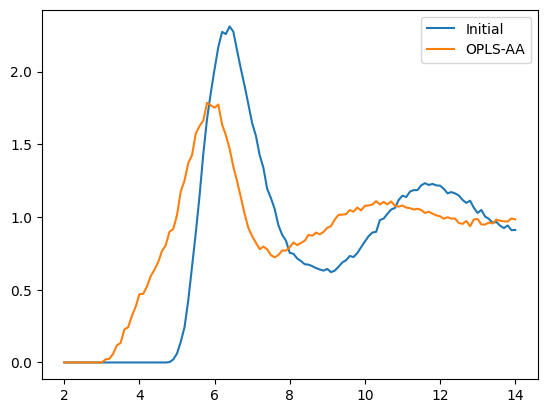

In [83]:
traj_init = md.load("init.dcd", top="box_DMC.pdb")[20:]
rdf_frames_init = compute_rdf_frame(traj_init, x_ref*0.1)
rdf_init = rdf_frames_init.mean(axis=0)

plt.plot(x_ref, rdf_init, label = "Initial")
#plt.plot(x_ref, y_ref, label = "Experiment")
plt.plot(m_ref, n_ref, label = "OPLS-AA")

plt.legend()
plt.show()

Up to now, we have completed the preparation for force field optimization. Before starting the optimization loop, we need to prepare some few tools. Here, we introduce the distinctive feature of DMFF - Property Estimator.

The computational cost of computing deep computational graphs that span the entire trajectory in molecular dynamics simulations is significantly high in terms of both time and computation. However, this drawback can be mitigated by a trajectory reweighting approach. In DMFF, the reweighting algorithm is introduced in the MBAR method, which extends the differentiable estimators for ensemble averages and free energies.

![s](https://i.postimg.cc/v8VbtcQH/Traj-reweighting.jpg)

### Optimization of Physical Properties Based on the Zwanzig Reweighting Scheme

The core of this optimization scheme is the following derivation process:

$$\left<A\right>_{H_1}=\frac{\int{A\left(r\right)\exp\left[-\beta U^{H_1}\left(r\right)\right]dr}}{Z_{H_1}}$$
$$=\frac{\int{A\exp\left[-\beta \left(U^{H_1}-U^{H_2}+U_{H_2}\right)\right]dr}}{Z_{H_1}}$$
$$=\frac{\int{A\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\exp\left(-\beta U^{H_2}\right)dr}}{Z_{H_1}}$$
$$=\frac{\int{A\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\exp\left(-\beta U^{H_2}\right)dr}}{Z_{H_2}}\frac{Z_{H_2}}{Z_{H_1}}$$
$$=\left<A\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\right>_{H_2}\frac{Z_{H_2}}{Z_{H_1}}$$

where
$$Z_{H_1}=\int{\exp\left[-\beta U^{H_1}\left(r\right)\right]dr}$, $Z_{H_2}=\int{\exp\left[-\beta U^{H_2}\left(r\right)\right]dr}$$


This implies that we can estimate the ensemble average of$H_1$sing the average value under the$H_2$ensemble.

and $\frac{Z_{H_1}}{Z_{H_2}}$can be further transformed into:
$$\frac{Z_{H_1}}{Z_{H_2}}=\frac{\int{\exp\left(-\beta U^{H_1}\right)dr}}{Z_{H_2}}$$
$$=\frac{\int{\exp\left[-\beta \left(U^{H_1}-U^{H_2}+U^{H_2}\right)\right]dr}}{Z_{H_2}}$$
$$=\frac{\int{\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\exp\left(-\beta U^{H_2}\right)dr}}{Z_{H_2}}$$
$$=\left<\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\right>_{H_2}$$

Then:
$$\left<A\right>_{H_1}=\left<\frac{\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]}{\left<\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\right>_{H_2}} A\right>_{H_2}=\sum^{H_2}_i {\frac{\exp\left[-\beta \left(U^{H_1}_i-U^{H_2}_i\right)\right]}{\left<\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\right>_{H_2}} A_i}$$

$\frac{\exp\left[-\beta \left(U^{H_1}_i-U^{H_2}_i\right)\right]}{\left<\exp\left[-\beta \left(U^{H_1}-U^{H_2}\right)\right]\right>_{H_2}}$can be viewed as the weight of conformation when estimating the sampling of$H_1$using samples from the$H_2$potential function.

`ReweightEstimator`is a module provided by DMFF that employs the reweighting method to estimate physical quantities in a differentiable manner. The use of this module presupposes the implementation of various sampling and recalculating functions.

### 4.7 Optimize <a id ='4-10'></a>

In [84]:
optimizer = optax.adam(0.001)
opt_state = optimizer.init(paramset)

SAMPLE
1
#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
10000,0.6730764728182231,0,--
20000,0.6696147699946959,630,1:05
30000,0.6463700406350699,631,1:04
40000,0.6513872754825832,632,1:02
50000,0.6525823187238825,632,1:01
60000,0.6697139951608344,632,1:00
70000,0.6565018659501556,632,0:58
80000,0.6609978504701608,632,0:57
90000,0.6501425402456501,632,0:56
100000,0.640095565199735,632,0:54
110000,0.6443495006874734,631,0:53
120000,0.6453797909596053,631,0:52
130000,0.6530586356467012,631,0:50
140000,0.6511252331292993,631,0:49
150000,0.6493585685714136,631,0:47
160000,0.6611654692166531,631,0:46
170000,0.6299647190742841,631,0:45
180000,0.6550507623880887,631,0:43
190000,0.6495030541186503,631,0:42
200000,0.6487052133702255,631,0:41
210000,0.647436641281221,631,0:39
220000,0.6407083815064721,631,0:38
230000,0.6835766784819463,631,0:36
240000,0.6523389185956995,631,0:35
250000,0.6386700641861797,631,0:34
260000,0.6366873388067018,631,0:32
270000,0.6554711466088526,631,0:31
28

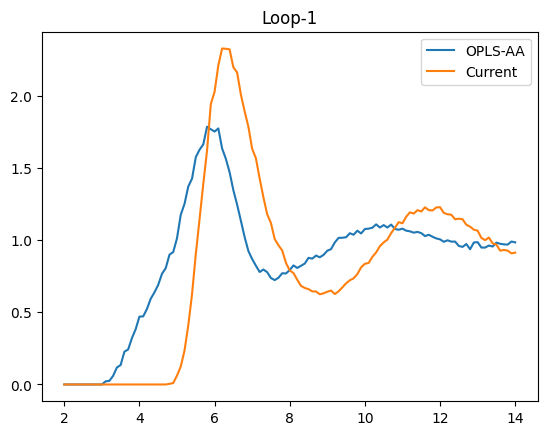

SAMPLE
2
#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
10000,0.651065525767448,0,--
20000,0.6714756355507168,618,1:07
30000,0.6594873077207757,621,1:05
40000,0.6665784796791466,621,1:03
50000,0.6831123394657903,622,1:02
60000,0.6637870831199422,622,1:01
70000,0.667129160757806,622,0:59
80000,0.6633039299251599,622,0:58
90000,0.6565053933125344,623,0:56
100000,0.671684912119932,623,0:55
110000,0.6500951019425772,623,0:54
120000,0.6666584351669924,623,0:52
130000,0.6659556977742978,623,0:51
140000,0.6611373098958204,623,0:49
150000,0.6513470763921477,623,0:48
160000,0.6417160185435988,623,0:47
170000,0.6658724588754958,623,0:45
180000,0.6495778453765773,623,0:44
190000,0.6599069482963903,623,0:42
200000,0.663304724598376,623,0:41
210000,0.6712636904995878,623,0:40
220000,0.6717563053654046,623,0:38
230000,0.665811826826304,623,0:37
240000,0.6676410416092742,623,0:36
250000,0.6662819912851742,623,0:34
260000,0.6700363479990482,623,0:33
270000,0.6637966195304331,623,0:31
28000

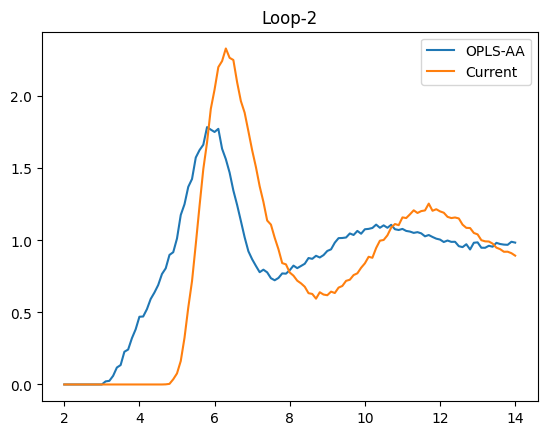

SAMPLE
3
#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
10000,0.6718645245702801,0,--
20000,0.6755685973414902,629,1:05
30000,0.6713169715821765,630,1:04
40000,0.6514334918471593,628,1:03
50000,0.6760486967657545,630,1:01
60000,0.6848578358624342,630,1:00
70000,0.6561299856470861,630,0:58
80000,0.6880366455873881,630,0:57
90000,0.667097398444723,630,0:56
100000,0.6667884760772556,630,0:54
110000,0.696671586450088,630,0:53
120000,0.654081476330793,631,0:52
130000,0.6626347019403445,631,0:50
140000,0.6731411830908128,631,0:49
150000,0.6655217808268538,631,0:47
160000,0.6538876323508401,631,0:46
170000,0.6611437435731256,631,0:45
180000,0.6637788251159248,631,0:43
190000,0.6650875672903395,631,0:42
200000,0.6714764348067651,631,0:41
210000,0.6807755044242513,631,0:39
220000,0.6769567213505293,631,0:38
230000,0.6671596753641728,631,0:36
240000,0.6845538694955645,631,0:35
250000,0.6822774711981981,631,0:34
260000,0.6783156195936104,631,0:32
270000,0.676567338642897,632,0:31
2800

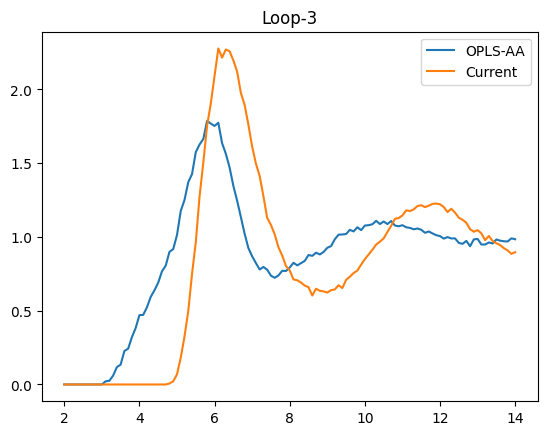

SAMPLE
4
#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
10000,0.6885785506889522,0,--
20000,0.6855313267936995,620,1:06
30000,0.6738399334137635,622,1:05
40000,0.6758683360787152,622,1:03
50000,0.6580422879144204,622,1:02
60000,0.685476791854041,623,1:01
70000,0.6723658334244308,623,0:59
80000,0.6841155136543882,622,0:58
90000,0.6697960378777031,622,0:56
100000,0.6693224815511806,622,0:55
110000,0.6776514780480505,622,0:54
120000,0.6782084962583117,622,0:52
130000,0.6711639748591046,622,0:51
140000,0.6729686574938444,622,0:50
150000,0.6808904909553964,622,0:48
160000,0.6604370949042647,622,0:47
170000,0.6654119614943933,622,0:45
180000,0.6754897723338992,622,0:44
190000,0.6930922087205912,622,0:43
200000,0.6927413572065216,622,0:41
210000,0.6635566632819155,622,0:40
220000,0.675689996696178,622,0:38
230000,0.6852580120296231,622,0:37
240000,0.685205721714706,622,0:36
250000,0.6651119129848674,622,0:34
260000,0.6580544201013442,622,0:33
270000,0.6846049610241778,622,0:31
280

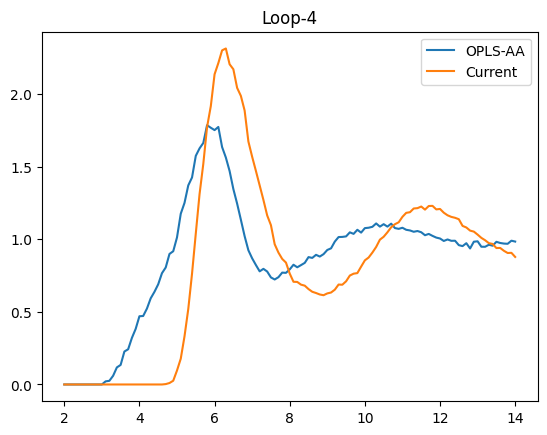

SAMPLE
5
#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
10000,0.6976382888743065,0,--
20000,0.6725511283112715,616,1:07
30000,0.6882838337373404,616,1:05
40000,0.6791127582776632,617,1:04
50000,0.6633986213858268,617,1:02
60000,0.669689813467961,617,1:01
70000,0.6572277858788221,618,1:00
80000,0.6692980231309368,618,0:58
90000,0.6663853828712928,618,0:57
100000,0.6609102909544062,618,0:55
110000,0.6877572224355598,618,0:54
120000,0.6897426343741119,618,0:53
130000,0.6710449057208788,618,0:51
140000,0.672662971700982,618,0:50
150000,0.6732441403013656,618,0:48
160000,0.653905534581875,617,0:47
170000,0.6786849938297382,618,0:46
180000,0.6688867374873644,617,0:44
190000,0.660636763570619,617,0:43
200000,0.658570550674693,617,0:41
210000,0.6717448165358701,617,0:40
220000,0.6838297466520072,617,0:39
230000,0.6745011684412172,617,0:37
240000,0.6571798790920299,617,0:36
250000,0.6649566841621759,617,0:34
260000,0.6737761415172699,617,0:33
270000,0.6862126163247438,617,0:32
28000

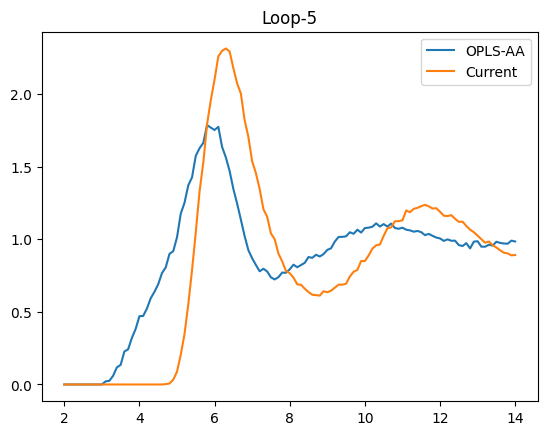

SAMPLE
6
#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
10000,0.688020305959254,0,--
20000,0.6893909023822415,620,1:06
30000,0.6917729602538208,623,1:05
40000,0.6739143910369427,624,1:03
50000,0.6558510853681656,624,1:02
60000,0.6989558022509464,624,1:00
70000,0.6895262296439162,624,0:59


KeyboardInterrupt: 

In [88]:
lbfgs = None
os.system("cp lj.xml loop-0.xml")
NL = 60
for nloop in range(1, NL+1):
    xmlrender(f"loop-{nloop-1}.xml", 'res.xml', f"loop-{nloop-1}.xml")
    # sample
    print("SAMPLE")
    print(nloop)
    runMD(f"loop-{nloop-1}.xml", f"loop-{nloop}.dcd")
    print("RERUN")
    ener = rerun_energy(f"loop-{nloop-1}.xml", f"loop-{nloop}.dcd", removeLJ=False, skip=20)
    ener_no_lj = rerun_energy(f"loop-{nloop-1}.xml", f"loop-{nloop}.dcd", skip=20)
    print("ESTIMATOR")
    traj = md.load(f"loop-{nloop}.dcd", top="box_DMC.pdb")[20:]
    estimator = ReweightEstimator(ener, base_energies=ener_no_lj, volume=traj.unitcell_volumes)

    print("CALC DENSE & RDF")
    density = md.density(traj) * 0.001

    # get loss & grad
    # Define loss function
    rdf_frames = compute_rdf_frame(traj, x_ref*0.1)

    def loss(paramset):
        lj_jax = rerun_dmff_lennard_jones(paramset, "box_DMC.pdb", f"loop-{nloop}.dcd", lj_force, skip=20)
        weight = estimator.estimate_weight(lj_jax)

        rdf_pert = (rdf_frames * weight.reshape((-1, 1))).sum(axis=0)
        loss_ref = jnp.log(jnp.power(rdf_pert - n_ref, 2).mean())

        # loss function of density 
        dens = weight * density
        dens = dens.mean()
        loss_den = jnp.power(dens - 1.07, 2) * 10.0
    
        return loss_ref + loss_den
    
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    
    plt.plot(m_ref, n_ref, label = "OPLS-AA")
    # plt.plot(x_ref, y_ref, label = "Experiment")
    plt.plot(x_ref, rdf_frames.mean(axis=0), label = "Current")
    plt.legend()
    plt.title(f"Loop-{nloop}")
    # plt.savefig("compare.png")
    plt.show()
    
    # update parameters
    updates, opt_state = optimizer.update(g, opt_state)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)

    lj_gen.overwrite(paramset)
    io.writeXML(f"loop-{nloop}.xml", ffinfo)

In [57]:
xmlrender(f"loop-{NL}.xml", 'res.xml', f"loop-{NL}.xml")
sample_with_prm(f"loop-{NL}.xml", f"loop-{NL}.dcd")
traj = md.load(f"loop-{NL}.dcd", top="box_DMC.pdb")[20:]
rdf_final = compute_rdf_frame(traj, x_ref*0.1).mean(axis=0)

plt.plot(x_ref, rdf_init, label = "Initial")
plt.plot(m_ref, n_ref, label = "OPLS-AA")
#plt.plot(x_ref, y_ref, label = "Experiment")
plt.plot(x_ref, rdf_final, label = "Current")
plt.legend()
plt.title(f"Final")
# plt.savefig("compare.png")
plt.show()

#"Step","Density (g/mL)","Speed (ns/day)","Time Remaining"
20000,0.9034204023148491,0,--
40000,0.9134589209326665,1.21e+03,0:32
60000,0.9311857845324879,1.21e+03,0:31
80000,0.9209480174841933,1.21e+03,0:30
100000,0.9036050529338874,1.21e+03,0:28
120000,0.9120823292515017,1.21e+03,0:27
140000,0.9411380111912142,1.21e+03,0:25
160000,0.9263761966211715,1.21e+03,0:24
180000,0.9349105015898002,1.21e+03,0:22
200000,0.9028592257494273,1.21e+03,0:21
220000,0.9397294615775963,1.21e+03,0:20
240000,0.916016085063393,1.21e+03,0:18
260000,0.9369981516116607,1.21e+03,0:17
280000,0.911334635669278,1.21e+03,0:15
300000,0.9169613328351074,1.21e+03,0:14
320000,0.9107559836942581,1.21e+03,0:12
340000,0.9008690012597967,1.21e+03,0:11
360000,0.9255158510125162,1.21e+03,0:10
380000,0.9173521261898001,1.21e+03,0:08
400000,0.9199973033288819,1.21e+03,0:07
420000,0.9071096082489485,1.21e+03,0:05
440000,0.9137287359774533,1.21e+03,0:04
460000,0.8926880220808483,1.21e+03,0:02
480000,0.9341117246446181,1.21e+03,0

<Figure size 640x480 with 1 Axes>

## 5. Summary & Outlook <a id='summary'></a>
As an old saying goes in China, to do a good job, one must first sharpen his tools (工欲善其事，必先利其器). In the era of rapid development of differentiable programming techniques driven by the wave of deep learning, we have witnessed a new paradigm in force field development. We aim to transform force field development into an engineering-oriented, automated, and reproducible process, allowing us to reap the benefits of continuous integration/development and the open-source spirit. DMFF, along with other related projects in **DeepModeling** community, will promote and implement this transformative change.

DMFF is currently in the early stages of rapid iteration and development. There are many areas that require further improvement and numerous possibilities worth exploring:

- DMFF, along with projects like dflow, aims to implement common force field fitting workflows, such as fitting dihedral angles, free energies, probability distributions, and more. These workflows will be integrated into the software to provide users with a comprehensive suite of tools for force field development and parameterization.

- DMFF is committed to continuous development and will strive to meet the evolving needs of the scientific community. This includes expanding the range of supported force field function forms to accommodate a wider variety of molecular systems.

- DMFF recognizes the importance of integrating advanced molecular dynamics algorithms with force field development. By leveraging state-of-the-art sampling techniques and enhanced sampling methods, DMFF aims to enhance the accuracy and efficiency of force field optimization and simulations.

- Absolutely! DMFF recognizes the importance of user experience and aims to continuously improve its documentation, API, and overall usability. Providing clear and comprehensive documentation is essential for users to understand the functionality and usage of DMFF effectively.

Welcome to write Issues, initiate Discussions, and even submit Pull Requests in the DMFF GitHub project. Specifically:

- If you are a hardcore developer in the field of molecular force fields and are exploring new forms of force field functions, we welcome you to engage in in-depth discussions with the developers and contribute to enriching the force field calculation capabilities of DMFF.

- If you are dedicated to simulating a specific system and are struggling to find suitable force field parameters, you can become an angel user of DMFF. You can use DMFF to build a force field optimization workflow based on your own needs and provide valuable suggestions to us based on your practical requirements. Your feedback will contribute to the further development and improvement of DMFF.